In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

import matplotlib.pyplot as plt

import torch.optim as optim
import torch.nn as nn
import torch

import time
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

Specifiying the test and training data.

In [2]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'yes': 1, 'no': 0})

df[varlist] = df[varlist].apply(binary_mapping)
df = df.drop('furnishingstatus', axis=1)

y = df.pop('price').values.reshape(-1,1)
features = df.columns.tolist()
x = df.values

Splitting Training and Validation Set for a Fully Connected Neural Network.

In [3]:
x_n = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
y_n = torch.tensor(StandardScaler().fit_transform(y), dtype=torch.float32)

#x_train, x_val, y_train, y_val = train_test_split(x_n, y_n, test_size=0.8, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_n, y_n, train_size = 0.8, test_size = 0.2, random_state = 42)


Training Loop Structure

In [4]:
def training(epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):

  train_losses = []
  val_losses = []
  start_time = time.time()

  for epoch in range(1, epochs+1):

    model.train()
    h_train = model(x_train)
    train_loss = loss_fn(h_train, y_train)
    model.eval()

    with torch.no_grad():
      h_val = model(x_val)
      val_loss = loss_fn(h_val, y_val)

    # h_val = model(x_val)
    # val_loss = loss_fn(h_val, y_val)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if epoch % 500 == 0:
      current_time = time.time() - start_time
      with torch.no_grad():
          predictions = model(x_val)
          r2 = r2_score(y_val.numpy(), predictions.numpy())
      print(f"Epoch {epoch}: Training Time = {current_time:.2f}s, Training Loss = {train_loss.item():.4f}, Validation Loss = {val_loss.item():.4f}, R² = {r2:.4f}")
      #print(f"Epoch {epoch}. Training loss {train_loss.item()}, Validation loss {val_loss.item()}")b
  training_time = time.time() - start_time
  return train_losses, val_losses, training_time

1a. SGD Optimized Linear Model with 1 hidden layer


In [5]:
print("\nModel with 1 hidden layer")
seq_model_1 = nn.Sequential(
    nn.Linear(x.shape[1], 8),
    nn.Tanh(),
    nn.Linear(8, 1))

optimizer = optim.SGD(seq_model_1.parameters(), lr=1e-3)
train_losses_1, val_losses_1, training_time_1 = training(
    epochs = 5000,
    optimizer = optimizer,
    model = seq_model_1,
    loss_fn = nn.MSELoss(),
    x_train = x_train,
    x_val = x_val,
    y_train = y_train,
    y_val = y_val)


Model with 1 hidden layer
Epoch 500: Training Time = 0.81s, Training Loss = 0.5189, Validation Loss = 0.9667, R² = 0.3327
Epoch 1000: Training Time = 1.34s, Training Loss = 0.3649, Validation Loss = 0.7153, R² = 0.5060
Epoch 1500: Training Time = 1.87s, Training Loss = 0.3259, Validation Loss = 0.6290, R² = 0.5655
Epoch 2000: Training Time = 2.44s, Training Loss = 0.3122, Validation Loss = 0.5939, R² = 0.5897
Epoch 2500: Training Time = 3.03s, Training Loss = 0.3057, Validation Loss = 0.5771, R² = 0.6013
Epoch 3000: Training Time = 3.68s, Training Loss = 0.3019, Validation Loss = 0.5679, R² = 0.6076
Epoch 3500: Training Time = 4.20s, Training Loss = 0.2991, Validation Loss = 0.5625, R² = 0.6114
Epoch 4000: Training Time = 4.79s, Training Loss = 0.2969, Validation Loss = 0.5591, R² = 0.6138
Epoch 4500: Training Time = 5.36s, Training Loss = 0.2949, Validation Loss = 0.5568, R² = 0.6153
Epoch 5000: Training Time = 5.98s, Training Loss = 0.2932, Validation Loss = 0.5552, R² = 0.6164


1b. SGD Optimized Linear Model with two more additional hidden layers.

In [6]:
print("\nModel with two more additional hidden layers")
seq_model_3 = nn.Sequential(
    nn.Linear(x.shape[1], 8),
    nn.Tanh(),
    nn.Linear(8, 16),
    nn.Tanh(),
    nn.Linear(16, 4),
    nn.Tanh(),
    nn.Linear(4,1))

optimizer = optim.SGD(seq_model_3.parameters(), lr=1e-3)
train_losses_3, val_losses_3, training_time_3 = training(
    epochs = 5000,
    optimizer = optimizer,
    model = seq_model_3,
    loss_fn = nn.MSELoss(),
    x_train = x_train,
    x_val = x_val,
    y_train = y_train,
    y_val = y_val)


Model with two more additional hidden layers
Epoch 500: Training Time = 0.77s, Training Loss = 0.7499, Validation Loss = 1.2836, R² = 0.1134
Epoch 1000: Training Time = 1.46s, Training Loss = 0.5672, Validation Loss = 1.0211, R² = 0.2950
Epoch 1500: Training Time = 2.11s, Training Loss = 0.4039, Validation Loss = 0.7547, R² = 0.4788
Epoch 2000: Training Time = 2.76s, Training Loss = 0.3488, Validation Loss = 0.6367, R² = 0.5602
Epoch 2500: Training Time = 3.42s, Training Loss = 0.3322, Validation Loss = 0.5944, R² = 0.5894
Epoch 3000: Training Time = 4.06s, Training Loss = 0.3230, Validation Loss = 0.5760, R² = 0.6020
Epoch 3500: Training Time = 4.84s, Training Loss = 0.3162, Validation Loss = 0.5659, R² = 0.6090
Epoch 4000: Training Time = 5.73s, Training Loss = 0.3108, Validation Loss = 0.5591, R² = 0.6138
Epoch 4500: Training Time = 6.58s, Training Loss = 0.3063, Validation Loss = 0.5537, R² = 0.6174
Epoch 5000: Training Time = 7.57s, Training Loss = 0.3026, Validation Loss = 0.549

Evaluation


Evaluating 1 Hidden Layer Model:
MSE: 0.5552, R2: 0.6164, Training Time: 5.99 seconds

Evaluating 3 Hidden Layer Model:
MSE: 0.5491, R2: 0.6206, Training Time: 7.57 seconds


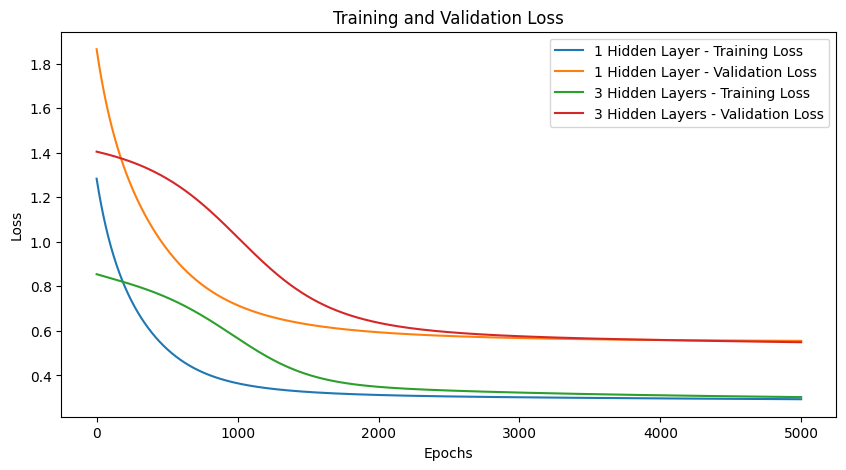


Analysis:
1. The 3 Hidden Layer Model has higher model complexity.
2. Compare R² scores: Higher R² indicates better accuracy, with values closer to 1 indicating better fit.
3. Examine MSE: Lower MSE indicates the model's predictions are closer to the true values. A large MSE may suggest the model struggles to capture data trends accurately.
4. Examine overfitting: Large gaps between training and validation losses suggest overfitting in the model.
5. Model training time: The model with more hidden layers generally takes longer due to increased computational complexity.


In [7]:
def evaluate(model, x_val, y_val):
    model.eval()
    with torch.no_grad():
        predictions = model(x_val)
    mse = mean_squared_error(y_val.numpy(), predictions.numpy())
    r2 = r2_score(y_val.numpy(), predictions.numpy())
    return mse, r2

# Evaluate Models
print("\nEvaluating 1 Hidden Layer Model:")
mse_1, r2_1 = evaluate(seq_model_1, x_val, y_val)
print(f"MSE: {mse_1:.4f}, R2: {r2_1:.4f}, Training Time: {training_time_1:.2f} seconds")

print("\nEvaluating 3 Hidden Layer Model:")
mse_3, r2_3 = evaluate(seq_model_3, x_val, y_val)
print(f"MSE: {mse_3:.4f}, R2: {r2_3:.4f}, Training Time: {training_time_3:.2f} seconds")

# Plotting Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses_1, label='1 Hidden Layer - Training Loss')
plt.plot(val_losses_1, label='1 Hidden Layer - Validation Loss')
plt.plot(train_losses_3, label='3 Hidden Layers - Training Loss')
plt.plot(val_losses_3, label='3 Hidden Layers - Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Analyze Results
print("\nAnalysis:")
print("1. The 3 Hidden Layer Model has higher model complexity.")
print("2. Compare R² scores: Higher R² indicates better accuracy, with values closer to 1 indicating better fit.")
print("3. Examine MSE: Lower MSE indicates the model's predictions are closer to the true values. A large MSE may suggest the model struggles to capture data trends accurately.")
print("4. Examine overfitting: Large gaps between training and validation losses suggest overfitting in the model.")
print("5. Model training time: The model with more hidden layers generally takes longer due to increased computational complexity.")
